# IMDB Movie Database
## by Khaled Basiony

> We are going to analyze a dataset from the IMDB containing movies from about 1920 to 2020, with various details about the movies like the language, genre, lead actor, director, budget, revenue, rating, score, etc.. <br><br>
Imagine you want to create a movie, and you want to learn from the past by analyzing the data and gaining insights from it, and that is exactly what we are going to do.<br>
So let's start analyzing!

Well the first and foremost important step is to have a general (or specific) idea of what you want from the data, for example: <br>
- What are the most trending Ratings?<br>
- is Revenue related to Budget?<br>
- which lead actors or directors to consider?<br>
- how long should the movie be?<br>
- what is the range of revenues to be expected nowadays?<br>
- does doing a movie with more age restriction decrease its score?<br>

but, let's not get ahead of ourselves, first we need to wrangle the data before exploring it.<br>



```
# import libraries
```



In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import pickle
from bs4 import BeautifulSoup
import requests

# Setting plotting settings
%matplotlib inline
sns.set()

```
#import your dataset 
```

In [2]:
# Reading dataset into pandas dataframe
data_path = './IMDd-Movie-Database.csv'
df = pd.read_csv(data_path)

In [3]:
# Displaying general info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                3725 non-null   object 
 1   Release Date         3725 non-null   object 
 2   Color/B&W            3725 non-null   object 
 3   Genre                3725 non-null   object 
 4   Language             3723 non-null   object 
 5   Country              3725 non-null   object 
 6   Rating               3676 non-null   object 
 7   Lead Actor           3722 non-null   object 
 8   Director Name        3725 non-null   object 
 9   Lead Actor FB Likes  3722 non-null   float64
 10  Cast FB Likes        3725 non-null   int64  
 11  Director FB Likes    3725 non-null   int64  
 12  Movie FB Likes       3725 non-null   int64  
 13  IMDb Score (1-10)    3725 non-null   float64
 14  Total Reviews        3724 non-null   float64
 15  Duration (min)       3724 non-null   f

In [4]:
df.head()

,Title,Release Date,Color/B&W,Genre,Language,Country,Rating,Lead Actor,Director Name,Lead Actor FB Likes,Cast FB Likes,Director FB Likes,Movie FB Likes,IMDb Score (1-10),Total Reviews,Duration (min),Gross Revenue,Budget
0,Over the Hill to the Poorhouse,15-09-1920,Black and White,Crime,English,USA,Not Rated,Stephen Carr,Harry F. Millarde,2.0,4,0,0,4.8,1.0,110.0,3000000,100000
1,Metropolis,26-01-1927,Black and White,Drama,German,Germany,Not Rated,Brigitte Helm,Fritz Lang,136.0,203,756,12000,8.3,260.0,145.0,26435,6000000
2,The Broadway Melody,11-11-1929,Black and White,Musical,English,USA,Passed,Anita Page,Harry Beaumont,77.0,109,4,167,6.3,36.0,100.0,2808000,379000
3,42nd Street,29-08-1933,Black and White,Comedy,English,USA,Unrated,Ginger Rogers,Lloyd Bacon,610.0,995,24,439,7.7,65.0,89.0,2300000,439000
4,Top Hat,15-04-1935,Black and White,Comedy,English,USA,Approved,Ginger Rogers,Mark Sandrich,610.0,824,10,1000,7.8,66.0,81.0,3000000,609000


**Find the mean, median, standard deviation**

In [5]:
df.describe()

,Lead Actor FB Likes,Cast FB Likes,Director FB Likes,Movie FB Likes,IMDb Score (1-10),Total Reviews,Duration (min),Gross Revenue,Budget
count,3722.000000,3725.000000,3725.000000,3725.000000,3725.000000,3724.000000,3724.000000,3.725000e+03,3.725000e+03
mean,7464.728103,11050.561611,793.286443,8614.911678,6.463732,159.881042,109.774705,4.972798e+07,4.436692e+07
std,15532.581521,18958.306272,3055.021574,20792.133048,1.058898,122.419180,22.849153,6.818220e+07,2.268511e+08
min,0.000000,0.000000,0.000000,0.000000,1.600000,1.000000,34.000000,1.620000e+02,2.180000e+02
25%,713.000000,1784.000000,10.000000,0.000000,5.900000,71.000000,95.000000,6.409206e+06,9.000000e+06
50%,1000.000000,3785.000000,58.000000,171.000000,6.600000,131.000000,105.000000,2.683000e+07,2.350000e+07
75%,12000.000000,15716.000000,221.000000,10000.000000,7.200000,217.000000,120.000000,6.445932e+07,5.000000e+07
max,640000.000000,656730.000000,23000.000000,349000.000000,9.300000,813.000000,330.000000,7.605058e+08,1.221550e+10


**Create a normalized form whose values range exactly between 0 and 1 so that the minimum has value 0 and maximum has value 1.**

In [6]:
# creating a 0 to 1 scale
def normalize(df):
    """ Returns a Dataframe with each numerical column scaled from 0 to 1. """
    # Initializing Dataframe
    norm = pd.DataFrame()
    
    # Looping over columns in the input Dataframe
    for col in df:
        # Skipping columns with type string
        if (df[col].dtype == 'object'):
            continue
            
        # Copying column Data to avoid altering it
        x = df[col].copy()
        minimum = x.min()
        maximum = x.max()
        
        # Shifting every entry so that the data starts from zero
        # Then dividing by the range of the data
        norm[col] = (x - minimum) / (maximum - minimum)
        
    # Returning Normalized Dataframe
    return norm

In [7]:
normalize(df).describe()

,Lead Actor FB Likes,Cast FB Likes,Director FB Likes,Movie FB Likes,IMDb Score (1-10),Total Reviews,Duration (min),Gross Revenue,Budget
count,3722.000000,3725.000000,3725.000000,3725.000000,3725.000000,3724.000000,3724.000000,3725.000000,3725.000000
mean,0.011664,0.016827,0.034491,0.024685,0.631653,0.195666,0.255996,0.065388,0.003632
std,0.024270,0.028868,0.132827,0.059576,0.137519,0.150763,0.077193,0.089654,0.018571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001114,0.002716,0.000435,0.000000,0.558442,0.086207,0.206081,0.008427,0.000737
50%,0.001563,0.005763,0.002522,0.000490,0.649351,0.160099,0.239865,0.035279,0.001924
75%,0.018750,0.023931,0.009609,0.028653,0.727273,0.266010,0.290541,0.084758,0.004093
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Compute the softmax score**

In [8]:
# Creating a softmax function
def softmax(df):
    """ Returns a Dataframe with softmax values for each numerical column."""
    # Initializing Dataframe
    soft = pd.DataFrame()
    
    # Looping over columns in Dataframe
    for col in df:
        # Skipping columns with type string
        if (df[col].dtype == 'object'):
            continue
            
        # Copying column Data to avoid altering it
        x = df[col].copy()
        
        # Working in the negative domain for numerical stability
        x -= x.max()
        x = x.apply(lambda x : np.exp(x))
        soft[col] = x / x.sum()
    return soft

In [9]:
softmax(df).sum()

Lead Actor FB Likes    1.0
Cast FB Likes          1.0
Director FB Likes      1.0
Movie FB Likes         1.0
IMDb Score (1-10)      1.0
Total Reviews          1.0
Duration (min)         1.0
Gross Revenue          1.0
Budget                 1.0
dtype: float64

**Find the number and position of missing values**

In [10]:
df[df.isna().any(axis=1)]

,Title,Release Date,Color/B&W,Genre,Language,Country,Rating,Lead Actor,Director Name,Lead Actor FB Likes,Cast FB Likes,Director FB Likes,Movie FB Likes,IMDb Score (1-10),Total Reviews,Duration (min),Gross Revenue,Budget
316,Marilyn Hotchkiss' Ballroom Dancing and Charm ...,16-01-1990,Color,Comedy,English,USA,NaN,William Hurt,Randall Miller,882.0,1967,19,16,7.1,1.0,34.0,333658,34000
408,Madadayo,05-09-1993,Color,Drama,Japanese,Japan,NaN,Tatsuo Matsumura,Akira Kurosawa,15.0,30,0,355,7.5,25.0,134.0,48856,11900000
517,Kids,10-12-1995,Color,Drama,English,USA,NaN,Rosario Dawson,Larry Clark,3000.0,3310,184,0,7.0,71.0,91.0,7417210,1500000
726,The Cure,08-12-1997,Color,Crime,Japanese,Japan,NaN,KÃ´ji Yakusho,Kiyoshi Kurosawa,89.0,115,62,817,7.4,78.0,111.0,94596,1000000
743,The Sticky Fingers of Time,17-12-1997,Black and White,Sci-Fi,English,USA,NaN,James Urbaniak,Hilary Brougher,119.0,154,0,67,6.3,8.0,81.0,18195,250000
745,The Swindle,27-12-1997,Color,Comedy,French,France,NaN,Isabelle Huppert,Claude Chabrol,678.0,1256,324,33,6.6,34.0,101.0,231417,60000000
793,Happiness,15-03-1998,Color,Comedy,English,USA,NaN,Philip Seymour Hoffman,Todd Solondz,22000.0,36859,377,0,7.8,148.0,134.0,3000000,3000000
804,Les couloirs du temps: Les visiteurs II,12-08-1998,Color,Comedy,French,France,NaN,Christian Clavier,Jean-Marie PoirÃ©,106.0,182,8,136,6.0,8.0,118.0,146072,140000000
880,Aimee & Jaguar,22-10-1999,Color,Biography,German,Germany,NaN,Heike Makatsch,Max FÃ¤rberbÃ¶ck,177.0,333,4,687,7.3,63.0,125.0,927107,15000000
1023,The Woman Chaser,19-02-1999,Black and White,Comedy,English,USA,NaN,Marilyn Rising,Robinson Devor,142.0,168,14,73,7.3,18.0,88.0,110720,1200000


In [11]:
df.isna().sum(axis=0)

Title                   0
Release Date            0
Color/B&W               0
Genre                   0
Language                2
Country                 0
Rating                 49
Lead Actor              3
Director Name           0
Lead Actor FB Likes     3
Cast FB Likes           0
Director FB Likes       0
Movie FB Likes          0
IMDb Score (1-10)       0
Total Reviews           1
Duration (min)          1
Gross Revenue           0
Budget                  0
dtype: int64

**Select the rows that does not have any value**

In [12]:
df[df.isna().all(axis=1)]

,Title,Release Date,Color/B&W,Genre,Language,Country,Rating,Lead Actor,Director Name,Lead Actor FB Likes,Cast FB Likes,Director FB Likes,Movie FB Likes,IMDb Score (1-10),Total Reviews,Duration (min),Gross Revenue,Budget


**Find the unique values and the count of unique values**

In [13]:
def get_val_counts(df):
    """ Returns a dictionary with the keys being column names, and the values being the result of value_counts method."""
    mx = {}
    for col in df:
        mx[col] = df[col].value_counts().sort_values(ascending=False)
    return mx

In [14]:
val_counts = get_val_counts(df)

**Find the most frequent value of dataset**

In [15]:
for i, v in get_val_counts(df).items():
    print("{0:22} {1:26} {2}".format(i + ' :', v.index.astype('str')[0], v.iloc[0]))

Title :                Saw V                      1
Release Date :         08-04-2004                 5
Color/B&W :            Color                      3597
Genre :                Comedy                     1016
Language :             English                    3543
Country :              USA                        2944
Rating :               R                          1679
Lead Actor :           Robert De Niro             41
Director Name :        Steven Spielberg           24
Lead Actor FB Likes :  1000.0                     343
Cast FB Likes :        0                          11
Director FB Likes :    0                          649
Movie FB Likes :       0                          1722
IMDb Score (1-10) :    6.7                        170
Total Reviews :        81.0                       28
Duration (min) :       101.0                      109
Gross Revenue :        8000000                    3
Budget :               20000000                   151


> The dataset consists of about 3725 entries with 18 columns, some of them have missing data, most of them are in the rating column, and since the rating column has ratings of movies across almost a century, thus movies of different eras have different rating standards, so it is not a surprise to see more problems in the rating column. <br><br>
Moreover, the Budget column has a ridiculously large value, so I had to check it out, and found something interesting, the currencies aren't the same! so a bit of cleaning is in order! 




----

# Cleaning
    - Standarize Rating column
    - Change rating type to category
    - Change names of columns to follow standards
    - Change type of date to datetime
    - Convert budget and revenue to have the same currency

Let's start by checking the rating column

In [16]:
val_counts['Rating']

R            1679
PG-13        1248
PG            553
G              91
Not Rated      43
Unrated        24
Approved       17
X               9
NC-17           6
Passed          3
M               2
GP              1
Name: Rating, dtype: int64

After a few minutes of research, I found out that these ratings are inconsistent.
Since there aren't many values, I am just going to hardcode it <br><br>
Note: in older times, movies had only 2 ratings, approved or not approved, since I don't know whether this is suitable for children or not, I am assuming it is NOT.<br>
so the ratings in order of Age Suitability are as follows: <br>
G  =>  PG  =>  PG-13  =>  R  =>  NC-17  =>  Approved  =>  Unrated

In [17]:
# Changing the rating values to follow one standard.
df['Rating'] = df['Rating'].str.replace('M', 'PG')
df['Rating'] = df['Rating'].str.replace('GP', 'PG')
df['Rating'] = df['Rating'].str.replace('X', 'NC-17')
df['Rating'] = df['Rating'].str.replace('Passed', 'Approved')
df['Rating'] = df['Rating'].str.replace('Not Rated', 'Unrated')
df['Rating'].fillna('Unrated', inplace=True)
df['Rating'].value_counts()

R           1679
PG-13       1248
PG           556
Unrated      116
G             91
Approved      20
NC-17         15
Name: Rating, dtype: int64

In [18]:
# Creating an Ordered Category DataType
ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17', 'Approved', 'Unrated']
cat = pd.api.types.CategoricalDtype(categories=ratings, ordered=True)
df['Rating'] = df['Rating'].astype(cat)

Now let's check the column names, it's not really a big deal, it is just a personal preference to have all the column names lower case seperated by underscores, it's just easier to call and makes it possible to use the dot notation.

In [19]:
df.columns

Index(['Title', 'Release Date', 'Color/B&W', 'Genre', 'Language', 'Country',
       'Rating', 'Lead Actor', 'Director Name', 'Lead Actor FB Likes',
       'Cast FB Likes', 'Director FB Likes', 'Movie FB Likes',
       'IMDb Score (1-10)', 'Total Reviews', 'Duration (min)', 'Gross Revenue',
       'Budget'],
      dtype='object')

In [20]:
# Change names to Lower Case Characters, and replace spaces with underscores
cols = list(df.columns.str.lower().str.replace(' ', '_'))

# View column names with their indices
list(enumerate(cols))

[(0, 'title'),
 (1, 'release_date'),
 (2, 'color/b&w'),
 (3, 'genre'),
 (4, 'language'),
 (5, 'country'),
 (6, 'rating'),
 (7, 'lead_actor'),
 (8, 'director_name'),
 (9, 'lead_actor_fb_likes'),
 (10, 'cast_fb_likes'),
 (11, 'director_fb_likes'),
 (12, 'movie_fb_likes'),
 (13, 'imdb_score_(1-10)'),
 (14, 'total_reviews'),
 (15, 'duration_(min)'),
 (16, 'gross_revenue'),
 (17, 'budget')]

In [21]:
# Hardcoding a few names
cols[2] = 'colored'
cols[13] = 'imdb_score'
cols[15] = 'duration'

In [22]:
# Assigning the new names to the dataframe
df.columns = cols

In [23]:
# Changing Color column to Bool Values
df['colored'] = df.colored.apply(lambda x: True if x=='Color' else False)

In [24]:
# Changing release date column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [25]:
df['release_date']

0      1920-09-15
1      1927-01-26
2      1929-11-11
3      1933-08-29
4      1935-04-15
          ...    
3720   2015-02-25
3721   2015-03-08
3722   2015-08-03
3723   2015-05-14
3724   2015-02-17
Name: release_date, Length: 3725, dtype: datetime64[ns]

Now Addressing the currency problem, to solve the inconsistent currency problem, I scraped a dictionary containing country names and their corresponding currency in another notebook, and saved the results as a pickle file, then scraped the exchange rate from each currency to Euro, and saved it into another pickle file.<br><br>
Ofcourse the process is not perfect, so there were some mistakes and hardcoding, also the exchange rates aren't consistent with the year, but I think it's good enough :)

In [26]:
# Reading the pickle file for Country -> Currency Mapping
with open('country_currency', 'rb') as f:
    country_curr = pickle.load(f)

In [27]:
country_curr

{'Afghanistan': 'AFN',
 'Akrotiri and Dhekelia': 'EUR',
 'Aland Islands': 'EUR',
 'Albania': 'ALL',
 'Algeria': 'DZD',
 'American Samoa': 'USD',
 'Andorra': 'EUR',
 'Angola': 'AOA',
 'Anguilla': 'XCD',
 'Antigua and Barbuda': 'XCD',
 'Argentina': 'ARS',
 'Armenia': 'AMD',
 'Aruba': 'AWG',
 'Ascension Island': 'SHP',
 'Australia': 'AUD',
 'Austria': 'EUR',
 'Azerbaijan': 'AZN',
 'Bahamas': 'BSD',
 'Bahrain': 'BHD',
 'Bangladesh': 'BDT',
 'Barbados': 'BBD',
 'Belarus': 'BYN',
 'Belgium': 'EUR',
 'Belize': 'BZD',
 'Benin': 'XOF',
 'Bermuda': 'BMD',
 'Bhutan': 'BTN',
 'Bolivia': 'BOB',
 'Bonaire': 'USD',
 'Bosnia and Herzegovina': 'BAM',
 'Botswana': 'BWP',
 'Brazil': 'BRL',
 'British Indian Ocean Territory': 'USD',
 'British Virgin Islands': 'USD',
 'Brunei': 'BND',
 'Bulgaria': 'BGN',
 'Burkina Faso': 'XOF',
 'Burundi': 'BIF',
 'Cabo Verde': 'CVE',
 'Cambodia': 'KHR',
 'Cameroon': 'XAF',
 'Canada': 'CAD',
 'Caribbean Netherlands': 'USD',
 'Cayman Islands': 'KYD',
 'Central African Republ

In [28]:
# Creating a currency column in the Dataframe
df['currency'] = df['country'].apply(lambda x: country_curr[x] if x in country_curr else None)

In [29]:
# finding the unmatched countries
df[df['currency'].isna()].country.unique()

array(['USA', 'UK', 'West Germany', 'Czech Republic', 'New Line',
       'Official site'], dtype=object)

In [30]:
# Hardcoding the Countries' names to their names in the dict
df['country'] = df['country'].str.replace('USA', 'United States of America')
df['country'] = df['country'].str.replace('UK', 'United Kingdom')
df['country'] = df['country'].str.replace('West Germany', 'Germany')
country_curr['Czech Republic'] = country_curr['Czechia']

In [31]:
# Recreating the currency column with the updated values
df['currency'] = df['country'].apply(lambda x: country_curr[x] if x in country_curr else None)

In [32]:
# Checking the remaining values
df[df['currency'].isna()]

,title,release_date,colored,genre,language,country,rating,lead_actor,director_name,lead_actor_fb_likes,cast_fb_likes,director_fb_likes,movie_fb_likes,imdb_score,total_reviews,duration,gross_revenue,budget,currency
1363,Town & Country,2001-11-03,True,Comedy,English,New Line,R,Del Zamora,Peter Chelsom,752.0,3133,23,53,4.4,62.0,104.0,6712451,90000000,None
2798,Country Strong,2010-10-17,True,Drama,English,Official site,PG-13,Leighton Meester,Shana Feste,3000.0,4204,19,0,6.3,135.0,117.0,20218921,15000000,None


Looks like these two country values weren't correctly collected from IMDB, they'll be dropped shortly

In [33]:
# Reading the pickle file with exchange rates of Currency -> Euro Mapping
with open('currency_convert', 'rb') as f:
    conv_curr = pickle.load(f)

Well the File actually cointains each currency value in euros, so to change the currency to euro we have to divide by the value in the dict, or multiply by 1/the value.

In [34]:
# Adding conversion factor to the dataframe.
df['conversion_factor'] = df['currency'].apply(lambda x: 1/float(conv_curr[x]) if x in conv_curr else None)

In [35]:
# fetching unmatched currencies
unmatched = df[df['conversion_factor'].isna()]['currency'].dropna().unique()

In [36]:
unmatched

array(['EUR', 'IRR', 'PEN', 'AWG', 'TWD', 'ARS', 'AFN', 'COP', 'GEL',
       'CLP'], dtype=object)

Well since these values are too many to do by hand, and too few to scrape another website for, we are going to use google search to find them, the simple code snippet below makes use of google's currency conversion in the search results, and fetches the exchange rate for each value.

In [37]:
# Initialize a list a values to be fetched
ls = []

# Looping over unmatched value
for i in unmatched:  
    
    # Collecting html search page using Beautiful Soup
    soup = BeautifulSoup(requests.get('https://www.google.com/search?hl=en&q={}+to+eur'.format(i)).content)
    
    # Collecting the exchange rates using specific class name
    for txt in soup.find_all('div', {'class': 'BNeawe iBp4i AP7Wnd'}):
        ls.append(txt.get_text())

In [38]:
ls

['0.000019 Euro',
 '0.000019 Euro',
 '0.23 Euro',
 '0.23 Euro',
 '0.45 Euro',
 '0.45 Euro',
 '0.029 Euro',
 '0.029 Euro',
 '0.0097 Euro',
 '0.0097 Euro',
 '0.010 Euro',
 '0.010 Euro',
 '0.00023 Euro',
 '0.00023 Euro',
 '0.25 Euro',
 '0.25 Euro',
 '0.0012 Euro',
 '0.0012 Euro']

Well, there are two simple problems now, each value is repeated twice, and each value is a string with ' Euro' attached to it, these should be some easy fixes. <br><br>
Note: the first search was 'eur to eur' and since google doesn't show the exchange rate for that, there was no class in the html code with the name above, so the values start from the currency after euro.

In [39]:
# Initializing a list of conversion factors, starting with 1 for Euro
missing = [1]

# Looping over list of values whie skipping duplicates
for i in range(0, len(ls), 2):
    missing.append(ls[i][:-5])

In [40]:
# Updating the conversion for each currency
for i, v in enumerate(unmatched):
    conv_curr[v] = 1/float(missing[i])

In [41]:
unmatched

array(['EUR', 'IRR', 'PEN', 'AWG', 'TWD', 'ARS', 'AFN', 'COP', 'GEL',
       'CLP'], dtype=object)

In [42]:
conv_curr

{'USD': '1.2193',
 'JPY': '126.38',
 'BGN': '1.9558',
 'CZK': '26.299',
 'DKK': '7.4389',
 'GBP': '0.89795',
 'HUF': '361.62',
 'PLN': '4.5022',
 'RON': '4.8725',
 'SEK': '10.0763',
 'CHF': '1.0851',
 'ISK': '155.90',
 'NOK': '10.5108',
 'HRK': '7.5461',
 'RUB': '90.5914',
 'TRY': '9.2275',
 'AUD': '1.6039',
 'BRL': '6.3608',
 'CAD': '1.5656',
 'CNY': '7.9624',
 'HKD': '9.4532',
 'IDR': '17314.06',
 'ILS': '3.9221',
 'INR': '89.6845',
 'KRW': '1344.97',
 'MXN': '24.3475',
 'MYR': '4.9510',
 'NZD': '1.7168',
 'PHP': '58.559',
 'SGD': '1.6195',
 'THB': '36.689',
 'ZAR': '17.8252',
 'EUR': 1.0,
 'IRR': 52631.57894736842,
 'PEN': 4.3478260869565215,
 'AWG': 2.2222222222222223,
 'TWD': 34.48275862068965,
 'ARS': 103.09278350515464,
 'AFN': 100.0,
 'COP': 4347.826086956522,
 'GEL': 4.0,
 'CLP': 833.3333333333334}

In [43]:
# Reassigning the convesion factor in the df
df['conversion_factor'] = df['currency'].apply(lambda x: 1/float(conv_curr[x]) if x in conv_curr else None)
df['conversion_factor'].isna().sum()

2

In [44]:
df.head()

,title,release_date,colored,genre,language,country,rating,lead_actor,director_name,lead_actor_fb_likes,cast_fb_likes,director_fb_likes,movie_fb_likes,imdb_score,total_reviews,duration,gross_revenue,budget,currency,conversion_factor
0,Over the Hill to the Poorhouse,1920-09-15,False,Crime,English,United States of America,Unrated,Stephen Carr,Harry F. Millarde,2.0,4,0,0,4.8,1.0,110.0,3000000,100000,USD,0.820143
1,Metropolis,1927-01-26,False,Drama,German,Germany,Unrated,Brigitte Helm,Fritz Lang,136.0,203,756,12000,8.3,260.0,145.0,26435,6000000,EUR,1.000000
2,The Broadway Melody,1929-11-11,False,Musical,English,United States of America,Approved,Anita Page,Harry Beaumont,77.0,109,4,167,6.3,36.0,100.0,2808000,379000,USD,0.820143
3,42nd Street,1933-08-29,False,Comedy,English,United States of America,Unrated,Ginger Rogers,Lloyd Bacon,610.0,995,24,439,7.7,65.0,89.0,2300000,439000,USD,0.820143
4,Top Hat,1935-04-15,False,Comedy,English,United States of America,Approved,Ginger Rogers,Mark Sandrich,610.0,824,10,1000,7.8,66.0,81.0,3000000,609000,USD,0.820143


In [45]:
# Converting Revenue and Budget to euros
df['revenue_eur'] = df['gross_revenue'] * df['conversion_factor']
df['budget_eur'] = df['budget'] * df['conversion_factor']

In [46]:
df.isna().sum(axis=0)

title                  0
release_date           0
colored                0
genre                  0
language               2
country                0
rating                 0
lead_actor             3
director_name          0
lead_actor_fb_likes    3
cast_fb_likes          0
director_fb_likes      0
movie_fb_likes         0
imdb_score             0
total_reviews          1
duration               1
gross_revenue          0
budget                 0
currency               2
conversion_factor      2
revenue_eur            2
budget_eur             2
dtype: int64

In [47]:
# dropping rows with missing values
df.dropna(inplace=True)

In [48]:
# checking there are no duplicated columns
df.duplicated().sum()

0

In [49]:
# dropping columns which are no longer useful
df.drop(columns=['gross_revenue', 'budget', 'currency', 'conversion_factor'], inplace=True)

In [50]:
# Checking there are no duplicated entries for movies
(df['title'].value_counts() > 1).sum()

0

In [51]:
# Saving the dataframe to a csv file as backup
df.to_csv('processed.csv')

# Type of data analysis
## Univariate
> is a term commonly used in statistics to describe a type of data which consists of observations on only a single characteristic or attribute.

>Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable.

## Bivariate
>In statistics, bivariate data is data on each of two variables, where each value of one of the variables is paired with a value of the other variable. Typically it would be of interest to investigate the possible association between the two variables.

>Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

## Multivariate
>Multivariate statistics is a subdivision of statistics encompassing the simultaneous observation and analysis of more than one outcome variable. The application of multivariate statistics is multivariate analysis.

>Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

![picture](https://drive.google.com/uc?export=view&id=1ors5QRIf6ISa-aidarRJ6A0-ueY31hk9)

------

# Univariate
> Make at least one chart
,write your observation under every chart

Since I am going to be doing this a lot, it's better to define a function for it.

In [52]:
def name_axes(xl='', yl='', title='', fontsize=15, y=1.02):
    """ Shows the name of the axes and title for the current subplot"""
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(title, fontsize=fontsize, y=y)

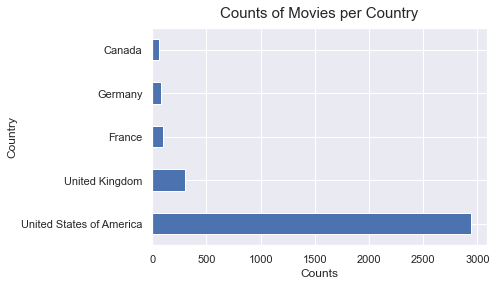

In [53]:
# Plotting counts of entries for each country
var = df['country']
var.value_counts()[:5].plot.barh()

name_axes('Counts', 'Country', 'Counts of Movies per Country')

As expected, Most movies in the dataset are from the USA

let's check the revenue distribution.

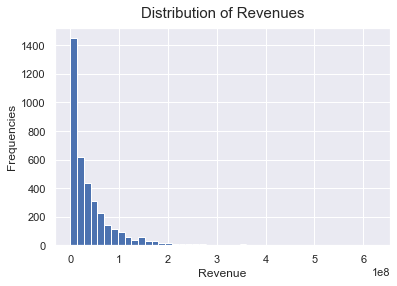

In [54]:
# Plotting the distribution of Revenues
var = df['revenue_eur']
ax = var.hist(bins=45)
xt = ax.get_xticks()

name_axes('Revenue', 'Frequencies', 'Distribution of Revenues')

it looks like the revenue is heavily right skewed, let's see if there are some outliers

In [55]:
# Checking what's skewing the data
var.describe()

count    3.716000e+03
mean     4.138698e+07
std      5.679426e+07
min      4.415492e+00
25%      5.006498e+06
50%      2.251866e+07
75%      5.444896e+07
max      6.237233e+08
Name: revenue_eur, dtype: float64

looks there are a few 9-figure-revenues that are skewing the distribution, so in order to see most of the distribution more clearly, let's see how it looks on a log scale

In [56]:
def arr_to_str(arr):
    """Returns an array of Scientific Notation for the numbers of the array."""
    rpr = []
    for elem in arr:
        exp = int(np.log10(elem))
        num = round(elem/(10**exp),0)
        rpr.append('{}e{}'.format(num, exp))
    return rpr

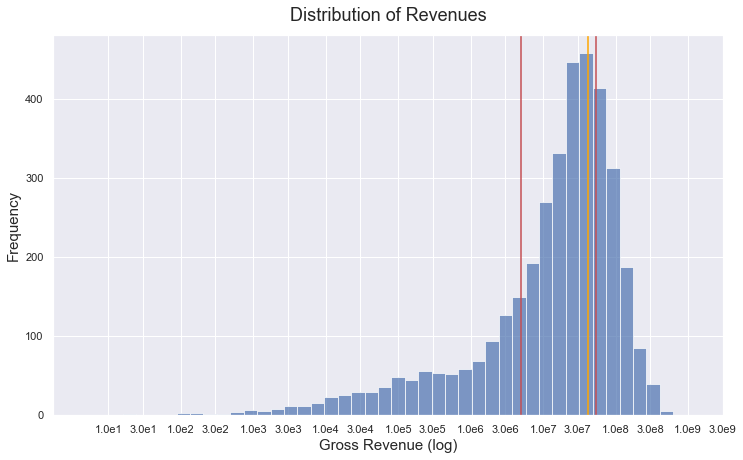

In [57]:
# Setting the figure
plt.figure(figsize=(12, 7))

# Creating log distributed bins for the plot
logbins = np.geomspace(var.min(), var.max(), 45)

# Plotting the histogram
ax = var.hist(bins=logbins, alpha= 0.7)

# Setting the scale to log
plt.xscale('log')

# Creating an array for major ticks
xtl = np.logspace(1, 9, 9)

# Creating an array with major and minor ticks
ticks = np.array(list(zip(xtl, xtl*3))).flatten()

# displaying the ticks with their labels on the plot
plt.xticks(ticks, arr_to_str(ticks));

# Setting the axes names and the title
plt.xlabel('Gross Revenue (log)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Distribution of Revenues', fontsize=18, y=1.02)

# Plotting the IQR and mean values
plt.axvline(var.quantile(0.25), color='r')
plt.axvline(var.quantile(0.75), color='r')
plt.axvline(var.mean(), color='orange')

Although this seems like a left skewed histogram, keep in mind this is plotted on a logscale <br><br>
That being said, we can say that more than 75% of the data are below the 1e8, to see this more clearly, let's check the cdf plot

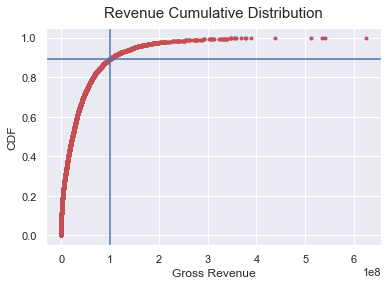

In [58]:
# Importing necessary library for ecdf
from statsmodels.distributions.empirical_distribution import ECDF
sns.set(style='darkgrid')
ecdf = ECDF(var)

# Plotting the CDF for the revenue
plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='none', color='r')

# Marking the value of 1e8
plt.axvline(1e8, color='b')
plt.axhline(ecdf([1e8]), color='b')

name_axes('Gross Revenue', 'CDF', 'Revenue Cumulative Distribution')

Actually about 90% of the data are below 1e8

Now Let's see how many of the movies in the set are colored, I am expecting a lot but wouldn't hurt to check

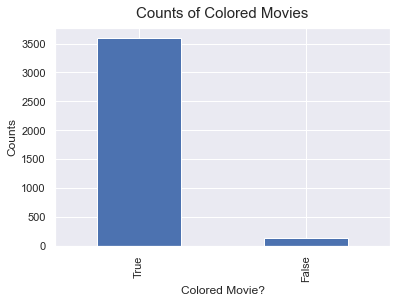

In [59]:
var = df['colored']
var.value_counts().plot(kind='bar');

name_axes('Colored Movie?', 'Counts', 'Counts of Colored Movies')

------

# Bivariate
> Make at least one chart
,write your observation under every chart

Now let's see if assigning a bigger budget for the movie means a bigger revenue

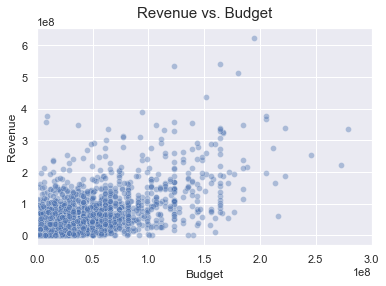

In [60]:
sns.scatterplot(data=df, x='budget_eur', y='revenue_eur', alpha=0.4)
plt.xlim([0, 3e8])

name_axes('Budget', 'Revenue', 'Revenue vs. Budget')

In [61]:
pearson_obs = df[['budget_eur', 'revenue_eur']].corr().iloc[0, 1]
pearson_obs

0.606908125271276

the pearson correlation coefficient shows that there is a positively moderate linear relationship here, but can this be due to chance ? let's find out

In [62]:
# Copying values from the original dataset to avoid modifying
x = df['budget_eur'].values.copy()
y = df['revenue_eur'].values.copy()

In [63]:
# Setting size for bootstrapping
size = 10000

# initializing an array of pearson coeffs
pearson_samples = np.empty(size)

# initializing an array of indices
inds = np.arange(len(x))
for i in range(size):
    # sampling the indices with replacement
    inds_samp = np.random.choice(inds, inds.shape[0], replace=True)
    
    # adding pearson's correlation coefficient of the resampled x, y pairs to the array
    pearson_samples[i] = np.corrcoef(x[inds_samp], y[inds_samp])[0, 1]

95% Confidence Interval of Pearson Correlation Coeffecient: [0.537,   0.667]


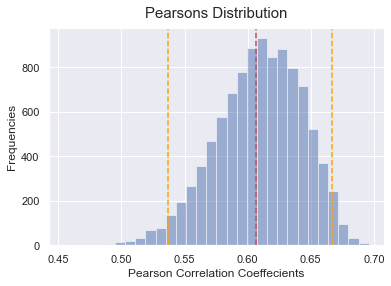

In [64]:
# plotting a distribution of Pearson Coeffs from the sampling
plt.hist(pearson_samples, bins=30, alpha=0.5)

# plotting the observed value of Pearson Coeff
plt.axvline(pearson_obs, linestyle='--', color='r')

# Estimating a Confidence Interval
ci = np.percentile(pearson_samples, [2.5, 97.5])
for lim in ci:
    plt.axvline(lim, linestyle='--', color='orange')
print("95% Confidence Interval of Pearson Correlation Coeffecient: [{:.3},   {:.3}]".format(ci[0], ci[1]))

name_axes('Pearson Correlation Coeffecients', 'Frequencies', 'Pearsons Distribution')

The results here suggest that there is some kind of correlation, so if I had to make a decision, I'd invest more in the budget, but I wouldn't go all in.

Now let's see if the duration somehow affects the rating, for example: <br>
if a movie gets too long, does the audience get too bored? <br>
or is the movie so great that it can't be wrapped in a regular length of a movie. <br><br>
let's set a threshold for a normal movie to be 2 hours long (120 mins) <br>
and a threshold for a good movie to be rated 7.5 and above.

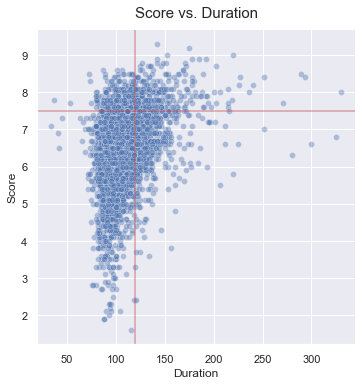

In [65]:
sns.relplot(data=df, x='duration', y='imdb_score', alpha=0.4)
plt.axvline(120, color='r', alpha=0.5)
plt.axhline(7.5, color='r', alpha=0.5)

name_axes('Duration', 'Score', 'Score vs. Duration')

In [66]:
# Calculating Percentages Regarding High Duration and High Score
high_dur_high_score = df[(df['duration'] >= 120) & (df['imdb_score'] >= 7.5)]
high_dur = df[df['duration'] >= 120]
high_score = df[df['imdb_score'] >= 7.5]
perc_dur = high_dur_high_score.shape[0] / high_dur.shape[0] * 100
perc_score = high_dur_high_score.shape[0] / high_score.shape[0] * 100

print("Proportion of High Duration High Score Movies to High Duration movies in general: {:.2f}%"\
      .format(perc_dur))
print("Proportion of High Duration High Score Movies to High Score movies in general: {:.2f}%"\
      .format(perc_score))

Proportion of High Duration High Score Movies to High Duration movies in general: 35.21%
Proportion of High Duration High Score Movies to High Score movies in general: 53.12%


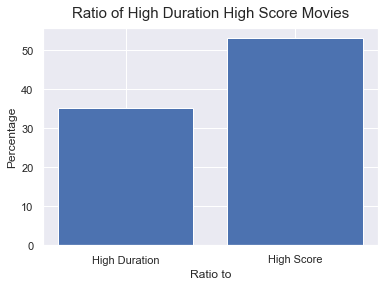

In [67]:
plt.bar(['High Duration', 'High Score'], [perc_dur, perc_score])

name_axes('Ratio to', 'Percentage', 'Ratio of High Duration High Score Movies')

So it looks like a little bit over 50% of High Scored movies actually have longer durations. <br>
Meanwhie, only 35% of movies with High Durations Have high scores! <br>
Confused? Welcome to Bayes' Theorem :D

now Let's have a glance at the scores of different movie ratings.

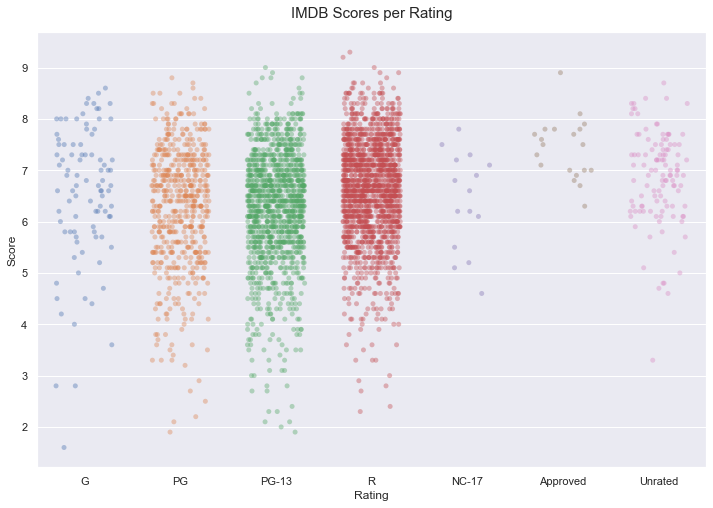

In [68]:
plt.figure(figsize=(12, 8))
sns.stripplot(data=df, x='rating', y='imdb_score', alpha=0.4, jitter=0.3)

name_axes('Rating', 'Score', 'IMDB Scores per Rating')

Apparently the rating doesn't affect scores much

but to be sure let's make one more thing

In [69]:
from sklearn.linear_model import Lasso

# one hot encoding the rating column
X = pd.get_dummies(df['rating'])
y = df['imdb_score']
print(  Lasso(alpha=0.1).fit(X, y).coef_, 
        Lasso(alpha=0.01).fit(X, y).coef_, sep='\n')

[ 0. -0. -0.  0. -0.  0.  0.]
[-0.         -0.24168581 -0.2967944   0.0114406  -0.          0.
  0.        ]


Basically what this tells us is that all of these variables are not describing the change in score, in other words you can't predict score based on rating, so I had to put a really small penalty value to get some coefficients for some of the ratings, which are PG, PG-13, and R. indicating that PG and PG-13 might slightly decrease score, and R might slightly increase score. <br><br>
but ofcourse this is after using a very small penaly, so the take from these results is, rating should not be an issue but I would be **slightly**, just **slightly** inclined to go with an R rated movie.

Let's see How the Budget and Revenue changed over time !

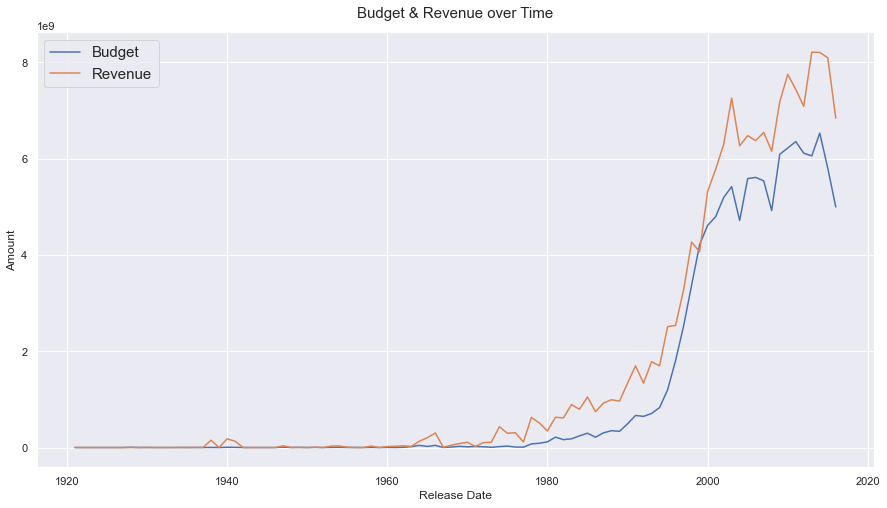

In [70]:
# Get the sum of columns based for each year
var = df.resample(on='release_date', rule='Y').sum()
plt.figure(figsize=(15, 8))

# Plotting the the graph
ax = sns.lineplot(data=var, x='release_date', y='budget_eur', label='Budget')
sns.lineplot(data=var, x='release_date', y='revenue_eur', label='Revenue', ax=ax)

# Showing the labels and legend
plt.legend(fontsize=15, fancybox=True)
name_axes('Release Date', 'Amount', 'Budget & Revenue over Time')

Wow ! it looks like both amounts were relatively low in the early days, maybe that's due to low data, or low economy, afterall it's not fair to compare the price's today with the prices 100 years ago. <br><br>
but there seems to be a huge outbreak around the 1990s at which the sum of either budget or revenue per year almost quadrupled.

Let's Check the score and revenue based on the Lead Actor

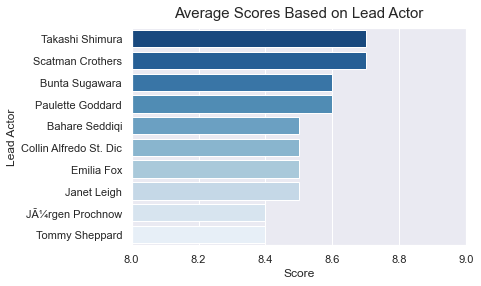

In [71]:
# Get the average of scores for every lead actor
var = df.groupby('lead_actor')['imdb_score'].mean().sort_values(ascending=False)[:10]
sns.barplot(y=var.index, x=var, palette='Blues_r')
plt.xlim([8, 9])

name_axes('Score', 'Lead Actor', 'Average Scores Based on Lead Actor')

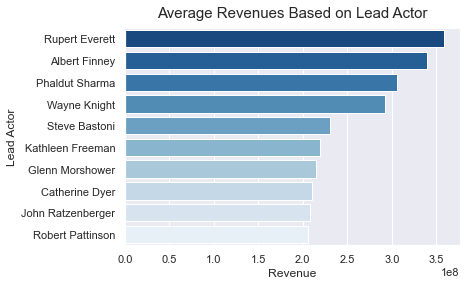

In [72]:
# Get the average revenue for every lead actor
var = df.groupby('lead_actor')['revenue_eur'].mean().sort_values(ascending=False)[:10]
sns.barplot(y=var.index, x=var, palette='Blues_r')

name_axes('Revenue', 'Lead Actor', 'Average Revenues Based on Lead Actor')

Ofcourse this doesn't prove anything, but it's nice to know the names of actors to consider if you are looking for a bigger revenue out of your movie

----


# Multivariate
> Make at least one chart
,write your observation under every chart

Let's check the Sums and Means of Budgets and Revenues for the movies, divided by years and ratings to see how each rating did in every era. <br>
since there are a lot of years to cover, I am going to group them into groups of 20, so for example 2020 actually holds the data for 2001 all the way to 2020, and so on.

(0.0, 56500000000.0)

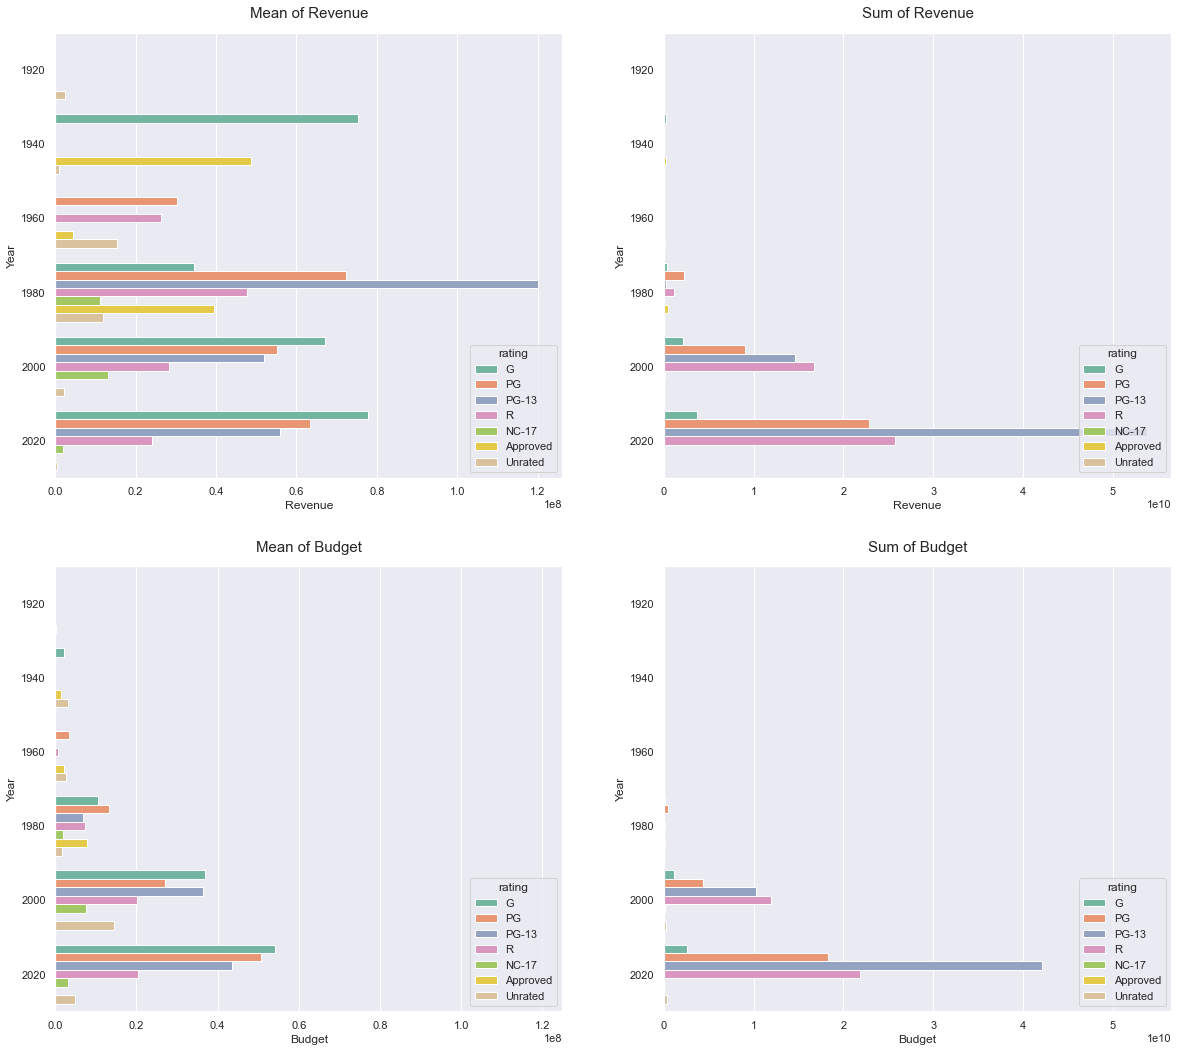

In [73]:
# Grouping dataset by date then rating with mean as aggregation function
var = df[['release_date', 'rating', 'revenue_eur', 'budget_eur']]\
            .groupby([pd.Grouper(freq='20Y', key='release_date'), 'rating']).mean().copy()
var.reset_index(inplace=True)
var['year'] = var.release_date.dt.year

sns.set(style='darkgrid')

# Plotting Mean of Revenues
plt.figure(figsize=(20, 18))
plt.subplot(221)
sns.barplot(data=var, y='year', x='revenue_eur', hue='rating', orient='h', palette='Set2')
name_axes('Revenue', 'Year', 'Mean of Revenue')
xt = plt.gca().get_xticks()

# Plotting Mean of Budgets
plt.subplot(223)
sns.barplot(data=var, y='year', x='budget_eur', hue='rating', orient='h', palette='Set2')
name_axes('Budget', 'Year', 'Mean of Budget')

# Setting xticks to be similar to the plot above it
plt.gca().set_xticks(xt)
plt.xlim([0, 1.25e8])



# Grouping dataset by date then rating with sum as aggregation function
var = df[['release_date', 'rating', 'revenue_eur', 'budget_eur']]\
            .groupby([pd.Grouper(freq='20Y', key='release_date'), 'rating']).sum().copy()
var.reset_index(inplace=True)
var['year'] = var.release_date.dt.year

# Plotting Sum of Revenues
plt.subplot(222)
sns.barplot(data=var, y='year', x='revenue_eur', hue='rating', orient='h', palette='Set2')
name_axes('Revenue', 'Year', 'Sum of Revenue')
xt = plt.gca().get_xticks()

# Plotting Sum of Budgets
plt.subplot(224)
sns.barplot(data=var, y='year', x='budget_eur', hue='rating', orient='h', palette='Set2')
name_axes('Budget', 'Year', 'Sum of Budget')
plt.gca().set_xticks(xt)
plt.xlim([0, 5.65e10])

Well, it looks like in the 60's and 70's the PG-13 movies were the hit, with average Revenue 10 times larger than the average Budget <br>
while in the 80's and 90's this wasn't the best choice based on the averages. <br>
But nowadays, we see that one terrible mistake, is to have a movie that's unrated, this would actually lead to a loss! <br><br>
Now shifting attention to the sum column, it seems that most of the budgets of movies are spent on PG-13 and R rated movies

Finally let's look at the revenue based on the popularity of the director, taking the facebook likes as an indicator

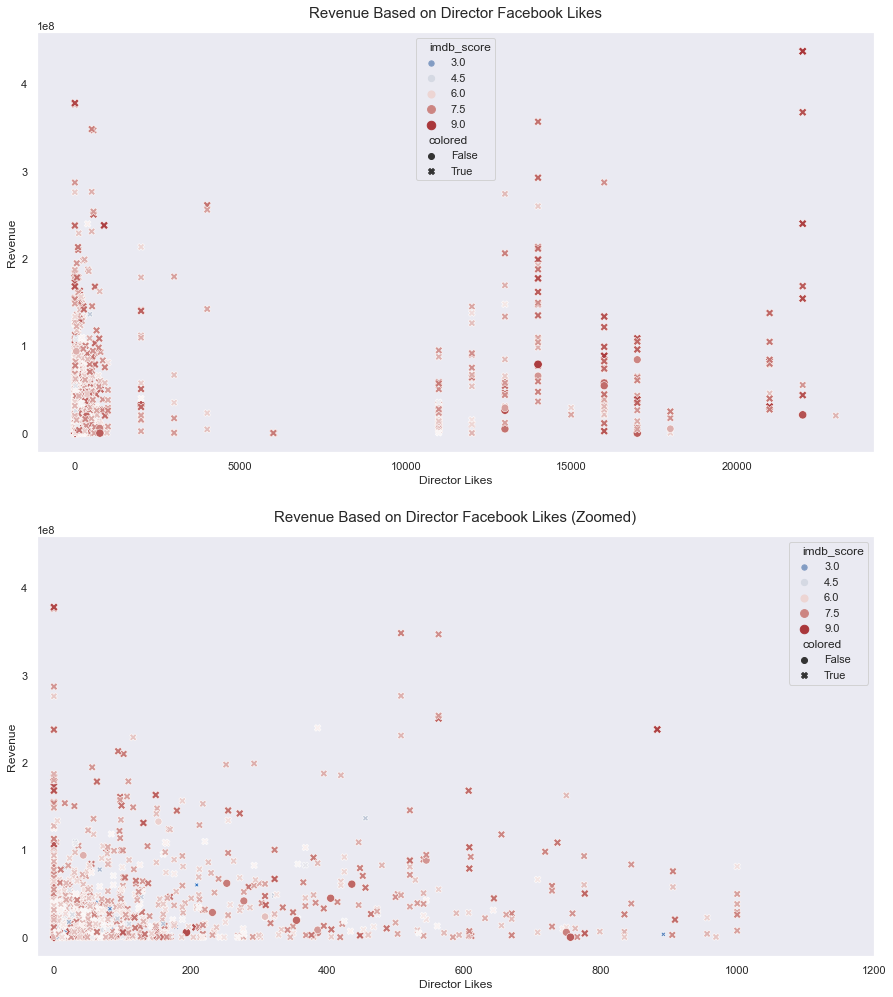

In [74]:
sns.set(style='dark')

# Sampling smaller values of fb_likes to avoid overplotted areas
condition = df['director_fb_likes'] > 1200
larger = df[condition]
smaller = df[~condition]
var = pd.concat([larger, smaller.sample(1000)])

# Plotting full scatter plot
plt.figure(figsize=(15, 17))
plt.subplot(211)
sns.scatterplot(data=var, x='director_fb_likes', y='revenue_eur', 
                hue='imdb_score', size='imdb_score', style='colored', palette='vlag')
name_axes('Director Likes', 'Revenue', 'Revenue Based on Director Facebook Likes')

# Plotting scatter plot while zooming on the clustered group on the left
plt.subplot(212)
sns.scatterplot(data=var, x='director_fb_likes', y='revenue_eur', 
                hue='imdb_score', size='imdb_score', style='colored', palette='vlag')
plt.xlim([-25, 1200])
name_axes('Director Likes', 'Revenue', 'Revenue Based on Director Facebook Likes (Zoomed)')

Well Considering That Facebook is relatively new, the we find that most of the values of fb likes are below 1200, however it doesn't seem that facebook likes have any effect on revenue of the movie though, but it looks like it does with score! the low scored movies tend to be more in the area with lower likes

Now Let's do the same with the Lead Actors

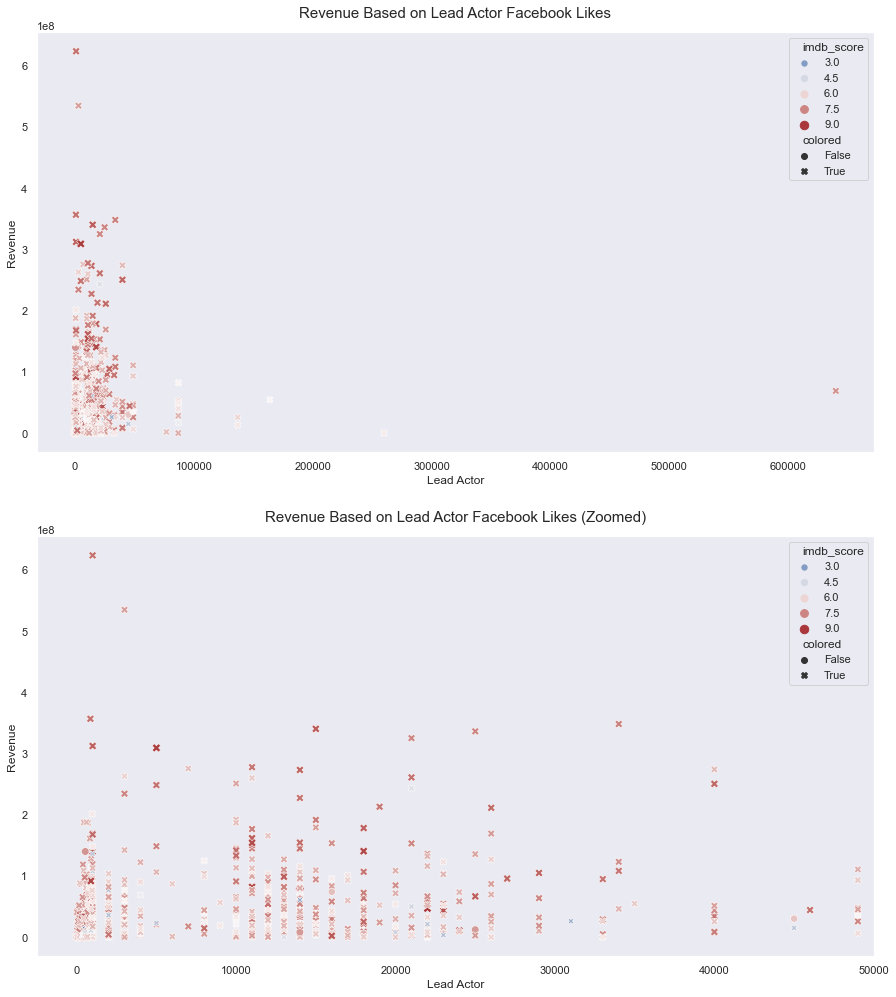

In [75]:
# Sampling smaller values of fb_likes to avoid overplotted areas
condition = df['lead_actor_fb_likes'] > 50000
larger = df[condition]
smaller = df[~condition]
var = pd.concat([larger, smaller.sample(1000)])

# Plotting full scatter 
plt.figure(figsize=(15, 17))
plt.subplot(211)
sns.scatterplot(data=var, x='lead_actor_fb_likes', y='revenue_eur', 
                hue='imdb_score', size='imdb_score', style='colored', palette='vlag')

name_axes('Lead Actor', 'Revenue', 'Revenue Based on Lead Actor Facebook Likes')

# Plotting scatter plot while zooming the clustered group on the left
plt.subplot(212)
sns.scatterplot(data=var, x='lead_actor_fb_likes', y='revenue_eur', 
                hue='imdb_score', size='imdb_score', style='colored', palette='vlag')
plt.xlim([-2500, 50000])
 
name_axes('Lead Actor', 'Revenue', 'Revenue Based on Lead Actor Facebook Likes (Zoomed)')

Well we reach mostly the same conclusion, in here however, we find that the actors have a much wider range of likes than directors which tells us the public is more affected by actors than directors, kind of obbvious, isn't it?

----

# SUMMARY
 



> finally we reach an ending with a more firm idea on decisions to take into consideration.

>List at least three insights.

1. Half the Revenues fall between 5 Millions and 54 Millions Euros, with an average of 41 Millions.
1. Increasing the budget might increase the Revenue, but I wouldn't go crazy with it.
1. Increasing the duration doesn't always mean higher score.
1. Most age restrictions of the modern era are PG-13 and R which have almost no effect on score apparently.
1. A more Popular director is more likely to get a higher score for the movie.
1. Actors are generally more popular than directors.

# Useful references

* [Python Guide](https://docs.python.org/3/tutorial/index.html)  
[Python Guide](https://www.w3schools.com/python/)
* [Data Cleaning Guide](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d)
* [Pandas Guide](https://pandas.pydata.org/docs/user_guide/index.html)
* [Matplotlib Examples](https://matplotlib.org/gallery/index.html)

* [Seaborn Examples](https://seaborn.pydata.org/examples/index.html)

